In [6]:
import os
import numpy as np
from PIL import Image, UnidentifiedImageError

data_dir = "D:\\Malaria dataset\\cell_images"
class_names = ["Parasitized", "Uninfected"]
image_size = (33, 33) # You can adjust the image size as you wish

# Create empty lists to store images and tags
images = []
labels = []

# Return image files for each class
for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    for image_file in os.listdir(class_path):
        if image_file.endswith(".png"):
            image_path = os.path.join(class_path, image_file)
            try:
                # Open the image and resize it
                image = Image.open(image_path).resize(image_size)
                # Convert to numpy array and add to list
                images.append(np.array(image))
                # Set the tag and add it to the list
                labels.append(class_names.index(class_name))
    
            except (UnidentifiedImageError, OSError) as e:
                print("Invalid File:", image_path)
                print("Mistake:", str(e))

# Convert images and labels to Numpy arrays
images = np.array(images)
labels = np.array(labels)

In [3]:
import os

In [4]:
images.shape

(2, 33, 33, 3)

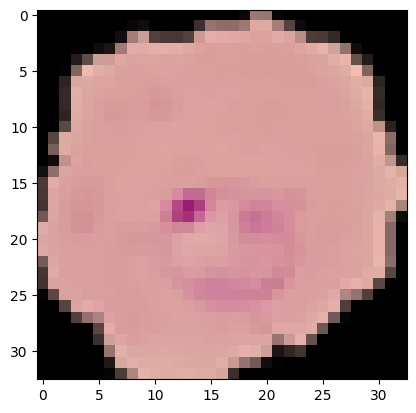

In [5]:
import matplotlib.pyplot as plt
plt.imshow(images[0],cmap='gray') #If you write the number of images in images,then print

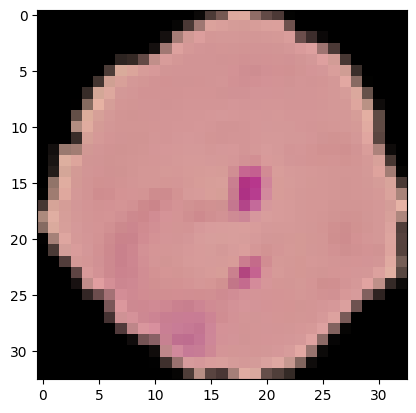

In [5]:
plt.imshow(images[500],cmap='gray')

In [6]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [7]:
#normalize
images=images/255.0

In [8]:
# Here, for example, we use 80% of the data as the training set and 20% as the test set
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

In [9]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,InputLayer,Reshape

In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(33,33,3)))#hidden layers (middle layers)shape 
model.add(Conv2D(64,(3,3),activation='relu')) 
model.add(MaxPooling2D(pool_size=(2,2)))#Maxpool CNN
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))#softmax added because there is more than one problem
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam',metrics='accuracy')#classification 

In [11]:
history=model.fit(train_images,train_labels,batch_size = 10,epochs=5,verbose= 1,validation_data=(test_images,test_labels))

Epoch 1/5


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(




2205/2205 [==============================] - 79s 35ms/step - loss: 0.3402 - accuracy: 0.8416 - val_loss: 0.1658 - val_accuracy: 0.9479
Epoch 2/5
2205/2205 [==============================] - 64s 29ms/step - loss: 0.1520 - accuracy: 0.9468 - val_loss: 0.1498 - val_accuracy: 0.9492
Epoch 3/5
2205/2205 [==============================] - 65s 29ms/step - loss: 0.1293 - accuracy: 0.9555 - val_loss: 0.1377 - val_accuracy: 0.9537
Epoch 4/5
2205/2205 [==============================] - 69s 31ms/step - loss: 0.1138 - accuracy: 0.9607 - val_loss: 0.1418 - val_accuracy: 0.9512
Epoch 5/5
2205/2205 [==============================] - 70s 32ms/step - loss: 0.1007 - accuracy: 0.9643 - val_loss: 0.1495 - val_accuracy: 0.9512


In [12]:
_,accuracy=model.evaluate(test_images,test_labels)
print('Accuracy=%2f'%(accuracy*100))

173/173 [==============================] - 3s 16ms/step - loss: 0.1495 - accuracy: 0.9512
Accuracy=95.119739


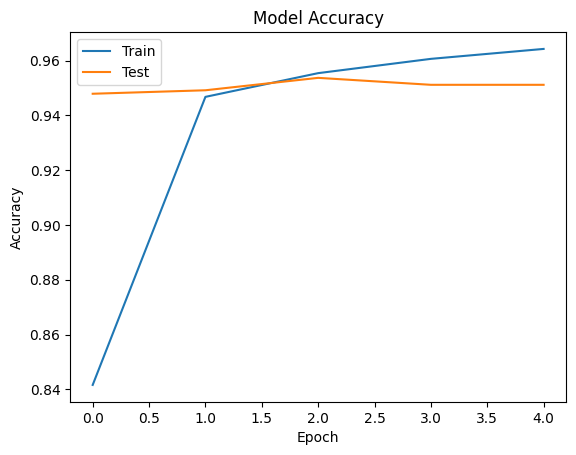

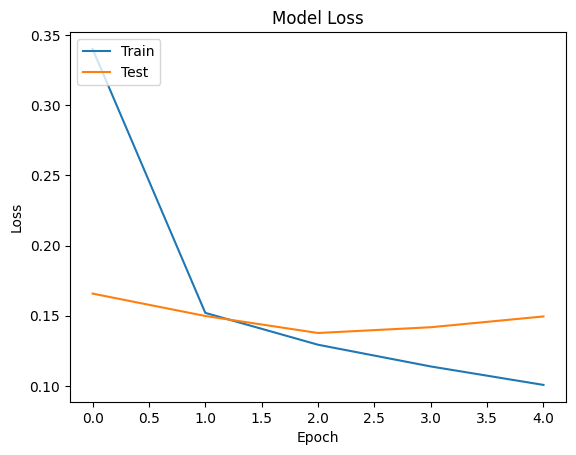

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()

In [14]:
model.save('malariadetection_modle.keras')

In [3]:

from tensorflow.keras.models import load_model
mm = load_model('malariadetection_modle.keras')

In [4]:

print(mm)

In [5]:
mm.predict(np.expand_dims(images[0],axis=0))

1/1 [==============================] - 1s 618ms/step


array([[1., 0.]], dtype=float32)

In [20]:
from tf_explain.core.grad_cam import GradCAM

grad_cam = GradCAM(mm, mm.layers[-3]) 
heatmap = grad_cam.explain(Images[0], top_pred_idx=0)

TypeError: GradCAM() takes no arguments